# Modely konkurence populací


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import solve_ivp

## Lotkův--Volterrův model konkurence dvou populací

## Konkurence tří populací

In [2]:
meze = [0,200]
def konkurence_tri(t,X,a=1,b=1,c=0.4,d=1.4,alpha=1,beta=1.5,gamma=1,delta=0.5,m=1,n=0.7,o=1.2,p=1):
    x,y,z = X
    return [(a-b*x-c*y-d*z)*x, (alpha-beta*x-gamma*y-delta*z)*y,(m-n*x-o*y-p*z)*z]
parametry = (1, 1,   0.3, 1.6,
             1, 1.8, 1,   0.2,
             1, 0.3, 1.8, 1  )

pocatecni_podminky = [ [.2,.5,0.8],
                       [0,.5,0.8],
                     ]

t = np.linspace(*meze,400)
reseni = [
    solve_ivp(
        konkurence_tri,
        meze,
        pocatecni_podminka,
        t_eval=t,
        args=parametry
        )
    for pocatecni_podminka in pocatecni_podminky];

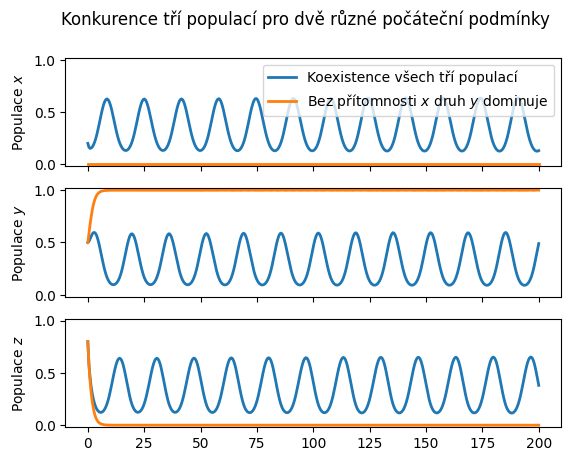

In [3]:
popisky=[rf"Populace ${i}$" for i in ["x","y","z"]]
fig,ax = plt.subplots(3,1,sharex=True)    

for barva,res in enumerate(reseni):
    for i in range(len(ax)):
        ax[i].plot(t,res.y[i],color="C"+str(barva),lw=2)
        ax[i].set(
            ylim=(-0.02,1.02),
            ylabel=popisky[i],
        )
plt.suptitle("Konkurence tří populací pro dvě různé počáteční podmínky")        
ax[0].legend(["Koexistence všech tří populací",r"Bez přítomnosti $x$ druh $y$ dominuje"]);

### Úkol

1. Zaujalo vás oscilatorické chování systému? Chová se takto systém skutečně, nebo
jde jenom o nějakou zaokrouhlovací a numerickou chybu. Navrhněte postup, jak
toto zjistit. Návod: pročtěte si parametry příkazu `solve_ivp` a promyslete, který
má vliv na přesnost aproximace řešení.
2. Zkuste v systému nasadit ještě silnější míru konkurence. Všechny koeficienty
   mezidruhové konkurence, které jsou větší než jedna, zkuste dále navyšovat a sledovat, jestli neuvidíte
   nějaké další zajímavé chování.